<a href="https://colab.research.google.com/github/nkale882/Market_Basket_Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Machine Learning/online_retail_II.xlsx')
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Get shape (rows, columns)
df.shape

(525461, 8)

In [5]:
# View data types & non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
# Missing Values in Each Column
df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [7]:
#  Get Percentage of Missing Values
(df.isnull().sum() / len(df)) * 100


,0
Invoice,0.000000
StockCode,0.000000
Description,0.557225
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,20.539488
Country,0.000000


In [8]:
# Drop rows with missing Customer ID or Description
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Convert Invoice to string for grouping
df['Invoice'] = df['Invoice'].astype(str)


In [9]:
# Group by Invoice and aggregate items
basket = df.groupby('Invoice')['Description'].apply(list).reset_index(name='Items')

# Convert to list of transactions
transactions = basket['Items'].tolist()


In [10]:
#Efficient Apriori (Hash Tree Based)

!pip install efficient-apriori

In [13]:
from efficient_apriori import apriori

# Convert each transaction to a tuple
transactions = [tuple(tx) for tx in transactions]

# Run Apriori algorithm
itemsets, rules = apriori(transactions, min_support=0.01, min_confidence=0.3)

# Print frequent itemsets
print("Frequent Itemsets:")
print(itemsets)

# Print association rules
print("\nAssociation Rules:")
for rule in rules:
    print(rule)


Frequent Itemsets:
{1: {('15CM CHRISTMAS GLASS BALL 20 LIGHTS',): 264, ('PINK CHERRY LIGHTS',): 312, ('STRAWBERRY CERAMIC TRINKET BOX',): 1462, ('PINK DOUGHNUT TRINKET POT ',): 345, ('SAVE THE PLANET MUG',): 366, ('LOVE BUILDING BLOCK WORD',): 961, ('HOME BUILDING BLOCK WORD',): 1184, ('ASSORTED COLOUR BIRD ORNAMENT',): 1340, ('HEART IVORY TRELLIS LARGE',): 485, ('HEART FILIGREE DOVE LARGE',): 426, ('FULL ENGLISH BREAKFAST PLATE',): 250, ('AREA PATROLLED METAL SIGN',): 342, ('BATH BUILDING BLOCK WORD',): 292, ('SCOTTIE DOG HOT WATER BOTTLE',): 873, ('PARTY CONE CHRISTMAS DECORATION ',): 291, ('WOODEN BOX ADVENT CALENDAR ',): 365, ('RETRO COFFEE MUGS ASSORTED',): 271, ('INFLATABLE POLITICAL GLOBE ',): 265, ('PACK OF 20 SKULL PAPER NAPKINS',): 269, ('HANGING HEART ZINC T-LIGHT HOLDER',): 749, ('PINK BLUE FELT CRAFT TRINKET BOX',): 578, ('FELTCRAFT DOLL ROSIE',): 450, ('FELTCRAFT DOLL MARIA',): 240, ('FELTCRAFT DOLL EMILY',): 365, ('VINTAGE SNAKES & LADDERS',): 361, ('CHOCOLATE HOT WATER 

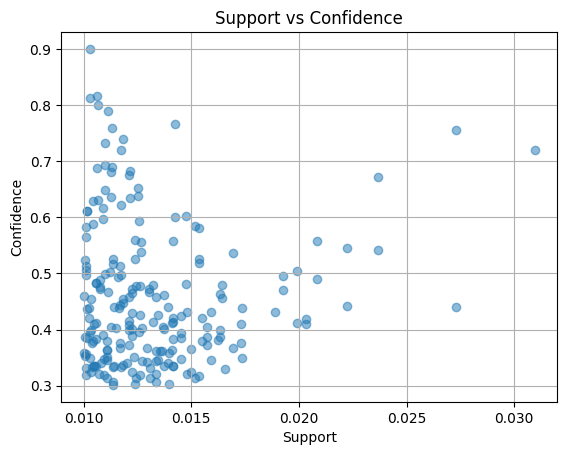

In [14]:
# Visualization of Rules
import matplotlib.pyplot as plt

support = [rule.support for rule in rules]
confidence = [rule.confidence for rule in rules]

plt.scatter(support, confidence, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()


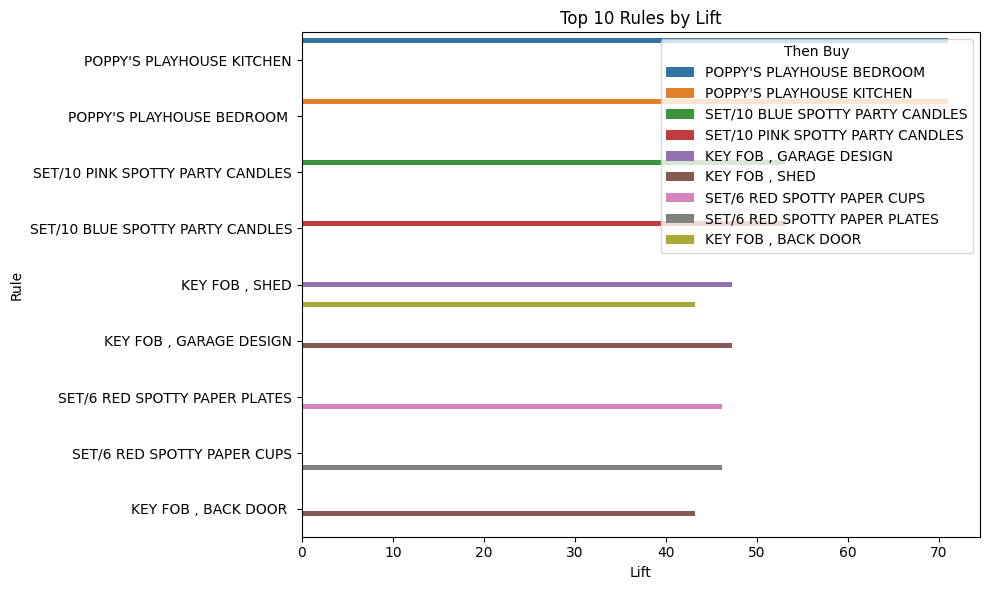

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by lift
top_lift = df_rules.sort_values(by='Lift', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Lift', y='LHS', data=top_lift, hue='RHS')
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.legend(title='Then Buy')
plt.tight_layout()
plt.show()


In [15]:
# Convert to DataFrame
top_rules = sorted(rules, key=lambda x: x.lift, reverse=True)[:10]

import pandas as pd
rule_data = {
    'LHS': [', '.join(x.lhs) for x in top_rules],
    'RHS': [', '.join(x.rhs) for x in top_rules],
    'Support': [x.support for x in top_rules],
    'Confidence': [x.confidence for x in top_rules],
    'Lift': [x.lift for x in top_rules]
}

df_rules = pd.DataFrame(rule_data)
df_rules


,LHS,RHS,Support,Confidence,Lift
0,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE BEDROOM,0.010302,0.812709,70.997659
1,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,0.010302,0.900000,70.997659
2,SET/10 PINK SPOTTY PARTY CANDLES,SET/10 BLUE SPOTTY PARTY CANDLES,0.010599,0.688705,53.086570
3,SET/10 BLUE SPOTTY PARTY CANDLES,SET/10 PINK SPOTTY PARTY CANDLES,0.010599,0.816993,53.086570
4,"KEY FOB , SHED","KEY FOB , GARAGE DESIGN",0.010684,0.631579,47.292231
5,"KEY FOB , GARAGE DESIGN","KEY FOB , SHED",0.010684,0.800000,47.292231
6,SET/6 RED SPOTTY PAPER PLATES,SET/6 RED SPOTTY PAPER CUPS,0.011320,0.689922,46.230686
7,SET/6 RED SPOTTY PAPER CUPS,SET/6 RED SPOTTY PAPER PLATES,0.011320,0.758523,46.230686
8,"KEY FOB , SHED","KEY FOB , BACK DOOR",0.010981,0.649123,43.251016
9,"KEY FOB , BACK DOOR","KEY FOB , SHED",0.010981,0.731638,43.251016


In [21]:
#Trying Examples

def recommend_by_item(item, rules):
    recommendations = []
    for rule in rules:
        if item in rule.lhs:
            recommendations.append((rule.rhs, rule.confidence, rule.lift))
    return sorted(recommendations, key=lambda x: x[1], reverse=True)

# Example: See what’s frequently bought with this product
recommend_by_item("SET/10 PINK SPOTTY PARTY CANDLES", rules)


[(('SET/10 BLUE SPOTTY PARTY CANDLES',),
  0.6887052341597796,
  53.08656979779975)]

In [22]:
for rule in rules:
    if "KEY FOB , SHED" in rule.lhs:
        print(rule)


{KEY FOB , SHED} -> {KEY FOB , BACK DOOR } (conf: 0.649, supp: 0.011, lift: 43.251, conv: 2.807)
{KEY FOB , SHED} -> {KEY FOB , GARAGE DESIGN} (conf: 0.632, supp: 0.011, lift: 47.292, conv: 2.678)


In [23]:
items_to_test = [
    "POPPY'S PLAYHOUSE BEDROOM",
    "72 SWEETHEART FAIRY CAKE CASES",
    "ASSORTED COLOUR BIRD ORNAMENT",
    "BAKING SET SPACEBOY DESIGN"
]

for item in items_to_test:
    print(f"💡 Recommendations for: {item}")
    print(recommend_by_item(item, rules)[:3])  # Top 3
    print("-----")


💡 Recommendations for: POPPY'S PLAYHOUSE BEDROOM
[]
-----
💡 Recommendations for: 72 SWEETHEART FAIRY CAKE CASES
[(('60 TEATIME FAIRY CAKE CASES',), 0.5193687230989957, 10.727101638998258), (('PACK OF 60 PINK PAISLEY CAKE CASES',), 0.4261119081779053, 10.772456139541534), (('PACK OF 72 RETRO SPOT CAKE CASES',), 0.40889526542324245, 8.250310201486757)]
-----
💡 Recommendations for: ASSORTED COLOUR BIRD ORNAMENT
[]
-----
💡 Recommendations for: BAKING SET SPACEBOY DESIGN
[(('BAKING SET 9 PIECE RETROSPOT ',), 0.5028462998102466, 11.074356371264507)]
-----


In [26]:
# Ask how many products to test
n = int(input("How many product names do you want to test? "))

# Loop through each input and give recommendations
for i in range(n):
    item = input(f"\nEnter product name {i+1}: ")
    recommendations = recommend_by_item(item, rules)

    if recommendations:
        print(f"\n📌 Recommendations for: {item}")
        for rhs, conf, lift in recommendations[:5]:  # Show top 5
            print(f"🛒 {', '.join(rhs)} | Confidence: {conf:.2%} | Lift: {lift:.2f}")
    else:
        print("❌ No recommendations found for this item.")


How many product names do you want to test? 6

Enter product name 1: SET/6 RED SPOTTY PAPER PLATES

📌 Recommendations for: SET/6 RED SPOTTY PAPER PLATES
🛒 SET/6 RED SPOTTY PAPER CUPS | Confidence: 68.99% | Lift: 46.23

Enter product name 2: SET/10 PINK SPOTTY PARTY CANDLES

📌 Recommendations for: SET/10 PINK SPOTTY PARTY CANDLES
🛒 SET/10 BLUE SPOTTY PARTY CANDLES | Confidence: 68.87% | Lift: 53.09

Enter product name 3: POPPY'S PLAYHOUSE BEDROOM
❌ No recommendations found for this item.

Enter product name 4: KEY FOB , SHED

📌 Recommendations for: KEY FOB , SHED
🛒 KEY FOB , BACK DOOR  | Confidence: 64.91% | Lift: 43.25
🛒 KEY FOB , GARAGE DESIGN | Confidence: 63.16% | Lift: 47.29

Enter product name 5: 72 SWEETHEART FAIRY CAKE CASES

📌 Recommendations for: 72 SWEETHEART FAIRY CAKE CASES
🛒 60 TEATIME FAIRY CAKE CASES | Confidence: 51.94% | Lift: 10.73
🛒 PACK OF 60 PINK PAISLEY CAKE CASES | Confidence: 42.61% | Lift: 10.77
🛒 PACK OF 72 RETRO SPOT CAKE CASES | Confidence: 40.89% | Lift: 8.